<a href="https://colab.research.google.com/github/GrTravis2/AgAid_Hackathon_25/blob/main/AgAID_Hackathon_25_Team_13_Crop_Residue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [31]:
"""
X, y = load_iris(return_X_y=True)

print(X)
type(X)
"""

df = pd.read_csv("data.csv",
                 header=0,
                 usecols= [
                     "y",
                     "x",
                     "red",
                     "green",
                     "blue",
                     "location",
                     "residue",
                 ],
                 dtype= {
                     "y" : int,
                     "x" : int,
                     "red" : int,
                     "blue" : int,
                     "green" : int,
                     "location": int,
                     "resdiue" : bool
                 },
                 nrows=1000
                 )
df

,y,x,red,green,blue,location,residue
0,0,0,105,101,92,0,False
1,0,1,91,86,80,0,False
2,0,2,57,52,48,0,False
3,0,3,67,62,59,0,True
4,0,4,50,44,44,0,True
...,...,...,...,...,...,...,...
995,1,483,9,0,3,0,True
996,1,484,12,6,8,0,True
997,1,485,6,0,2,0,True
998,1,486,14,8,10,0,True


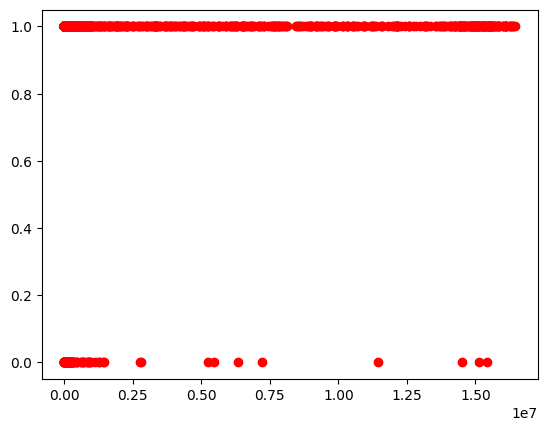

In [37]:
df["mag"] = df.red * df.green * df.blue
plt.scatter(df["mag"], df["residue"], c='r')

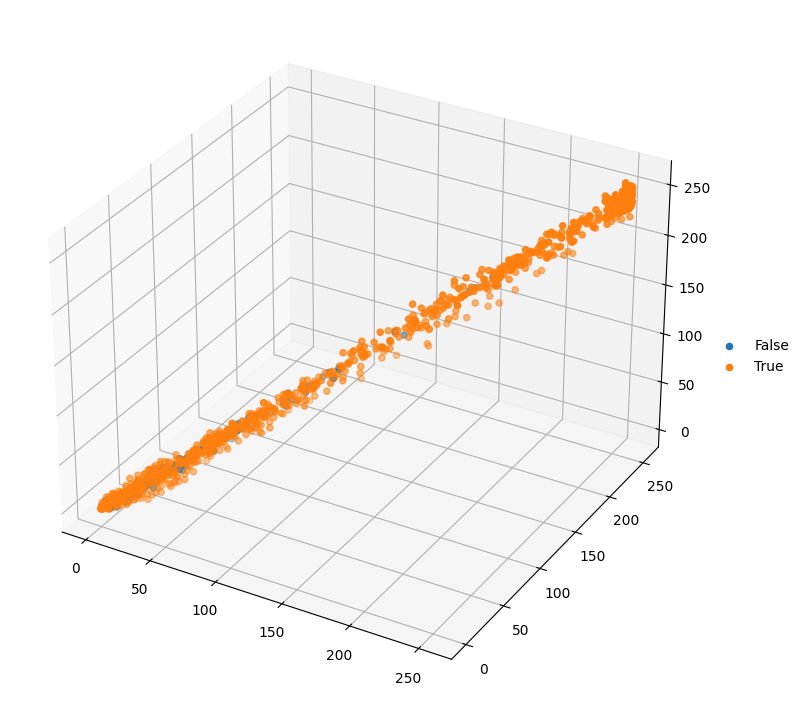

In [33]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(projection='3d')

for grp_name, grp_idx in df.groupby(["residue"]).groups.items():
    y = df.iloc[grp_idx,2]
    x = df.iloc[grp_idx,3]
    z = df.iloc[grp_idx,4]
    ax.scatter(x, y, z, label=grp_name)  # this way you can control color/marker/size of each group freely
    #ax.scatter(*df.iloc[grp_idx, [0, 1, 2]].T.values, label=grp_name)  # if you want to do everything in one line, lol

ax.legend(bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
plt.show()